In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
# load data
data = pd.read_pickle('data/237023_test_2025-03-04_13h38.52.136_eeg.pkl')
data['timestamp'] = data['timestamp'] - data['timestamp'][0]
data.set_index('timestamp', inplace=True)
data

,pkt,Fp1,Fp2,C3,C4,P7,P8,O1,O2,acx,...,oth2,oth3,oth4,oth5,oth6,oth7,ana1,ana2,ana3,marker
timestamp,,,,,,,,,,,,,,,,,,,,,
0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.088,...,253.0,64.0,10.0,64.0,26.0,80.0,0.0,0.0,0.0,0.0
0.017187,1.0,-7550.240463,-7686.854325,-7593.044054,-7516.824605,-146464.253541,-153211.306418,-88206.152702,-187091.655981,-0.088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0.020119,2.0,-7551.872140,-7688.038968,-7593.960475,-7517.808082,-146465.102907,-153212.155785,-88207.091475,-187092.505347,-0.088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.023119,3.0,-7550.978071,-7687.077843,-7592.865240,-7516.712846,-146463.739450,-153210.814680,-88205.839778,-187091.253649,-0.088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.027092,4.0,-7550.955719,-7687.323712,-7593.356978,-7517.092826,-146463.806506,-153210.837032,-88205.996240,-187091.208946,-0.088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18.246325,214.0,39357.510431,-70651.204366,-98260.459096,-147002.192974,-123138.420062,-187500.022352,-187500.022352,-122414.469411,-0.292,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18.251425,215.0,39265.287133,-70719.846573,-98485.943495,-147123.942926,-123205.967034,-187500.022352,-187500.022352,-122584.096799,-0.292,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18.255142,216.0,39112.669422,-70851.386589,-98780.673597,-147320.526519,-123361.781044,-187500.022352,-187500.022352,-122857.525689,-0.312,...,246.0,64.0,17.0,224.0,27.0,160.0,0.0,0.0,0.0,0.0


In [22]:
# extract markers for plotting them later
markers = data['marker'].groupby(data['marker']).apply(lambda x: list(x.index) if x.name!=0 else None)
markers.rename({1:'fix', 3:'arr', 4:'xarr', 5:'key'}, inplace=True)
markers.drop(0, inplace=True)

# define colors for different markers
mcolors = {'fix':'gray', 'arr':'red', 'xarr':'orange', 'key':'blue'}

markers

marker
fix     [0.017186880111694336, 2.3305587768554688, 3.7...
arr     [1.2122535705566406, 3.5253820419311523, 4.910...
xarr                [2.011018991470337, 9.24369478225708]
key     [2.3264479637145996, 3.7126121520996094, 5.593...
Name: marker, dtype: object

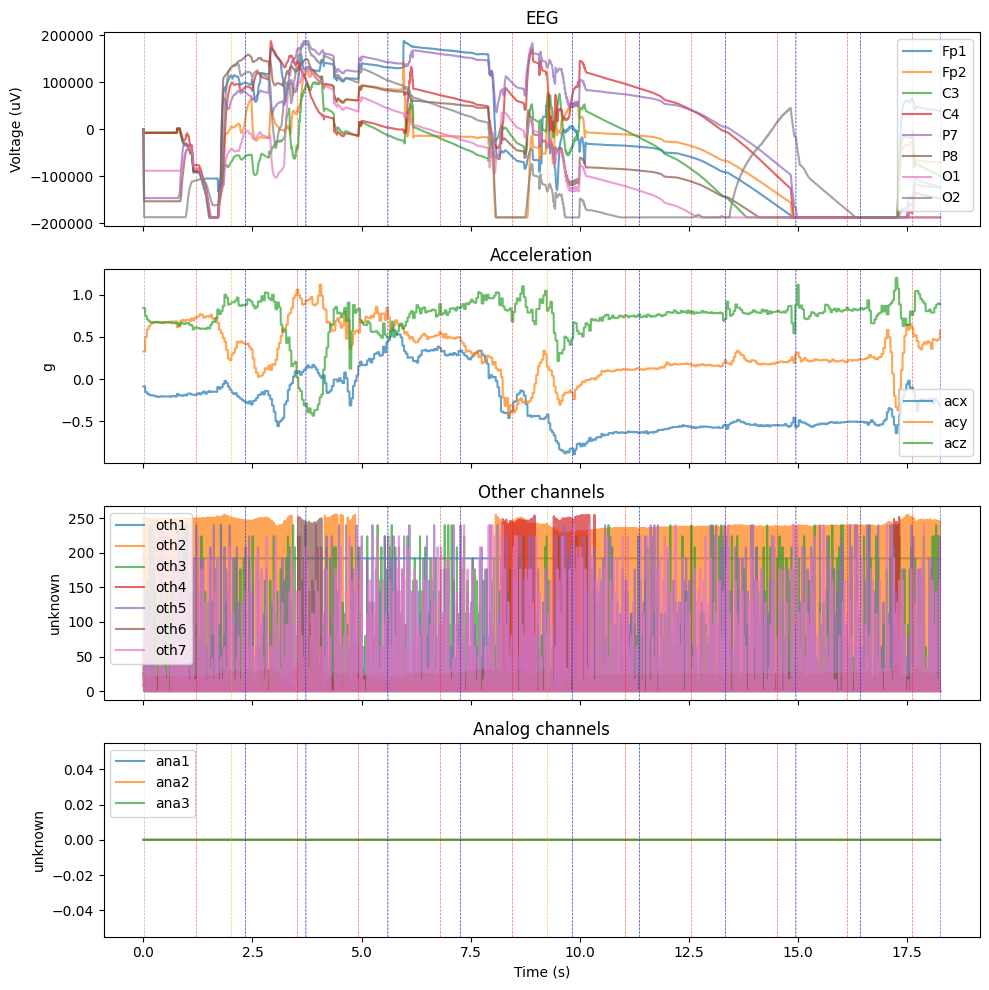

In [30]:
f, axes = plt.subplots(4, 1, figsize=(10, 10), sharex=True, tight_layout=True)

data[['Fp1', 'Fp2', 'C3', 'C4', 'P7', 'P8', 'O1', 'O2']].plot(ax=axes[0], alpha=0.7)
axes[0].set_title('EEG')
axes[0].set_ylabel('Voltage (uV)')
axes[0].set_xlabel('Time (s)')


data[['acx', 'acy', 'acz']].plot(ax=axes[1], alpha=0.7)
axes[1].set_title('Acceleration')
axes[1].set_ylabel('g')
axes[1].set_xlabel('Time (s)')

data[['oth1', 'oth2', 'oth3', 'oth4', 'oth5', 'oth6', 'oth7']].plot(ax=axes[2], alpha=0.7)
axes[2].set_title('Other channels')
axes[2].set_ylabel('unknown')
axes[2].set_xlabel('Time (s)')

data[['ana1', 'ana2', 'ana3']].plot(ax=axes[3], alpha=0.7)
axes[3].set_title('Analog channels')
axes[3].set_ylabel('unknown')
axes[3].set_xlabel('Time (s)')

for mtype in markers.index:
    color = mcolors[mtype]
    for m in markers[mtype]:
        axes[0].axvline(x=m, color=color, linestyle='--', lw=0.5, alpha=0.6)
        axes[1].axvline(x=m, color=color, linestyle='--', lw=0.5, alpha=0.6)
        axes[2].axvline(x=m, color=color, linestyle='--', lw=0.5, alpha=0.6)
        axes[3].axvline(x=m, color=color, linestyle='--', lw=0.5, alpha=0.6)